In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df['Gender'] = df['Gender'].replace('Male',1)

In [7]:
df['Gender'] = df['Gender'].replace('Female',0)

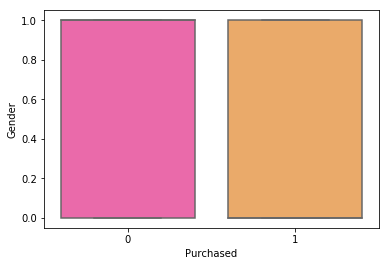

In [8]:
sns.boxplot(x='Purchased',y='Gender',data=df,palette='spring')

This shows that gender does not affect whether a user purchased or did not purchase.

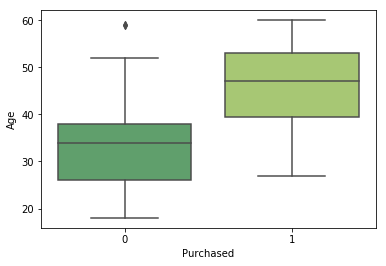

In [9]:
sns.boxplot(x='Purchased',y='Age',data=df,palette='summer')

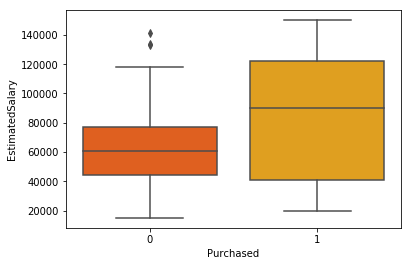

In [10]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=df,palette='autumn')

In [11]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.svm import SVC

In [15]:
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
predictions = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(confusion_matrix(y_test,predictions))

[[67  1]
 [24  8]]


In [19]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.74      0.99      0.84        68
          1       0.89      0.25      0.39        32

avg / total       0.79      0.75      0.70       100



In [20]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.63, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.63, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.63, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.63, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.63, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.63, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ........ C=1, gamma=0.0001, kernel=rbf, score=0.66, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ............ C=10, gamma=1, kernel=rbf, score=0.65, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ............ C=10, gamma=1, kernel=rbf, score=0.61, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ............ C=10, gamma=1, kernel=rbf, score=0.64, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .......... C=10, gamma=0.1, kernel=rbf, score=0.64, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .......... C=10, gamma=0.1, kernel=rbf, score=0.65, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .......... C=10, gamma=0.1, kernel=rbf, score=0.69, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [24]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [25]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
grid_predictions = grid.predict(X_test)

In [27]:
print(confusion_matrix(y_test,grid_predictions))

[[65  3]
 [15 17]]


In [28]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.81      0.96      0.88        68
          1       0.85      0.53      0.65        32

avg / total       0.82      0.82      0.81       100

